# PHY/MTH Modeling The Physical World - Air Resistance

## Tucker Knaak - Department of Physics, Creighton University - 2023

#### This code considers three types of air resistances (none, linear, and quadratic) in projectile motion.  This code assumes the object is spherical and takes in the initial x-y position and velocity to numerically solve the equations of motion for each model.  This code then plots a comparison of the trajectory for each type of air resistance.

In [1]:
'''Imports'''
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Trajectory():
    
    def __init__(self, mass, diameter):
        '''Constants'''
        self.g = 9.81             #acceleration due to gravity [m / s^2]
        self.m = mass             #mass of object [kg]
        self.D = diameter         #diameter of object (assuming a sphere) [m]
        self.beta = 1.6 * 10**-4  #linear drag constant [N * s / m^2]
        self.gamma = 0.25         #quadratic drag constant [N * s^2 / m^4]
        self.Re = 0.0
        
        '''Initial Conditions'''
        self.x0 = 0.0   #initial x-coordinate [m]
        self.y0 = 0.0   #initial y-coordinate [m]
        self.vx0 = 0.0  #initial x-component of velocity [m / s]
        self.vy0 = 0.0  #initial y-component of velocity [m / s]
        
        '''Lists of relevant data (time, coordinates, velocities for each model)'''
        #No air resistance
        self.t_points = []
        self.x_points = []
        self.y_points = []
        self.vx_points = []
        self.vy_points = []
        
        #Linear air resistance
        self.t_lin_points = []
        self.x_lin_points = []
        self.y_lin_points = []
        self.vx_lin_points = []
        self.vy_lin_points = []
        self.b = self.beta * self.D  #linear drag coefficient [N * s / m]
        
        #Quadratic air resistance
        self.t_quad_points = []
        self.x_quad_points = []
        self.y_quad_points = []
        self.vx_quad_points = []
        self.vy_quad_points = []
        self.c = self.gamma * self.D**2  #quadratic drag coefficient [N * s^2 / m^2]
        
    
    '''ODEs for no air resistance'''
    def NAR(self, t):
        #Equations of motion
        x = self.x0 + (self.vx0 * t)
        y = self.y0 + (self.vy0 * t) - (0.5 * self.g * t**2)
        vx = self.vx0
        vy = self.vy0 - (self.g * t)
        return np.array([x, y, vx, vy], dtype = 'float')
    
    
    '''ODEs for linear air resistance'''
    def LAR(self, t):
        #Equations of motion
        tau = self.m / self.b
        v_ter = self.g * tau
        x = self.x0 + (self.vx0 * tau) * (1 - np.exp(-t / tau))
        y = self.y0 - (v_ter * t) + (self.vy0 + v_ter) * tau * (1 - np.exp(-t / tau))
        vx = self.vx0 * np.exp(-t / tau)
        vy = self.vy0 * np.exp(-t / tau) + v_ter * (1 - np.exp(-t / tau))
        return np.array([x, y, vx, vy], dtype = 'float')
    
    
    '''ODEs for quadratic air resistance'''
    def QAR(self, r, t):
        #Current data
        x = r[0]
        y = r[1]
        vx = r[2]
        vy = r[3]
        
        #Equations of motion
        dx_dt = vx
        dy_dt = vy
        dvx_dt = (-self.c / self.m) * dx_dt * np.sqrt(dx_dt**2 + dy_dt**2)
        dvy_dt = (-self.c / self.m) * dy_dt * np.sqrt(dx_dt**2 + dy_dt**2) - self.g
        return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt], dtype = float)
    
    
    '''Solving the system of ODEs for each model'''
    def SolveODEs(self, x0, y0, vx0, vy0):
        self.x0 = x0
        self.y0 = y0
        self.vx0 = vx0
        self.vy0 = vy0
        self.Re = (1.6 * 10**3) * self.D * np.sqrt(self.vx0**2 + self.vy0**2)
        t = 0.0
        t_lin = 0.0
        t_quad = 0.0
        dt = 0.005
        
        #Appending initial conditions
        self.t_points.append(0.0)
        self.x_points.append(self.x0)
        self.y_points.append(self.y0)
        self.vx_points.append(self.vx0)
        self.vy_points.append(self.vy0)
        
        self.t_lin_points.append(0.0)
        self.x_lin_points.append(self.x0)
        self.y_lin_points.append(self.y0)
        self.vx_lin_points.append(self.vx0)
        self.vy_lin_points.append(self.vy0)
        
        self.t_quad_points.append(0.0)
        self.x_quad_points.append(self.x0)
        self.y_quad_points.append(self.y0)
        self.vx_quad_points.append(self.vx0)
        self.vy_quad_points.append(self.vy0)
        
        #No air resistance
        t += dt
        while self.y_points[-1] >= 0.0:
            x, y, vx, vy = self.NAR(t)
            self.t_points.append(t)
            self.x_points.append(x)
            self.y_points.append(y)
            self.vx_points.append(vx)
            self.vy_points.append(vy)
            t += dt
            
        #Linear air resistance
        t_lin += dt
        while self.y_lin_points[-1] >= 0.0:
            x_lin, y_lin, vx_lin, vy_lin = self.LAR(t_lin)
            self.t_lin_points.append(t_lin)
            self.x_lin_points.append(x_lin)
            self.y_lin_points.append(y_lin)
            self.vx_lin_points.append(vx_lin)
            self.vy_lin_points.append(vy_lin)
            t_lin += dt
            
        #Quadratic air resistance
        t_quad += dt
        r_quad = np.array([self.x0, self.y0, self.vx0, self.vy0], dtype = float)
        while self.y_quad_points[-1] >= 0.0:
            k1 = dt * self.QAR(r_quad, t)
            k2 = dt * self.QAR(r_quad + 0.5 * k1, t_quad + 0.5 * dt)
            k3 = dt * self.QAR(r_quad + 0.5 * k2, t_quad + 0.5 * dt)
            k4 = dt * self.QAR(r_quad + k3, t_quad + dt)
            r_quad += (k1 + 2 * k2 + 2 * k3 + k4) / 6
            self.t_quad_points.append(t_quad)
            self.x_quad_points.append(r_quad[0])
            self.y_quad_points.append(r_quad[1])
            self.vx_quad_points.append(r_quad[2])
            self.vy_quad_points.append(r_quad[3])
            t_quad += dt
    
    
    '''Plotting the trajectories for each model'''
    def PlotTrajectories(self):
        #Creating the figure
        fig, ax = plt.subplots(figsize = (8, 5), dpi = 100)
        ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
        ax.set_title('Models of Air Resistance (m = {mass}kg, D = {diameter}m)'.format(mass = self.m, diameter = self.D))
        ax.set_xlabel('x [m]')
        ax.set_ylabel('y [m]')
        
        #Plotting the trajectories for each model
        line1, = ax.plot(self.x_points, self.y_points, linestyle = 'dashed', color = 'black',
                         label = '$\overrightarrow{f}_{air}=0\hat{v}$')
        line2, = ax.plot(self.x_lin_points, self.y_lin_points, linestyle = 'solid', color = 'red',
                         label = '$\overrightarrow{f}_{air}=-bv\hat{v}$')
        line3, = ax.plot(self.x_quad_points, self.y_quad_points, linestyle = 'solid', color = 'blue',
                         label = '$\overrightarrow{f}_{air}=-cv^2\hat{v}$')
        
        #Formatting the drag coefficients
        line4, = ax.plot([], [], linestyle = 'dashed', color = 'black', label = 'Re = {:.2e}'.format(self.Re))
        line5, = ax.plot([], [], linestyle = 'solid', color = 'red', label = 'b = {:.2e} [N * s / m]'.format(self.b))
        line6, = ax.plot([], [], linestyle = 'solid', color = 'blue', label = 'c = {:.2e} [N * s^2 / m^2]'.format(self.c))
        
        #Adding the legends
        legend_1 = ax.legend(handles = [line1, line2, line3], loc = 'upper right')
        plt.gca().add_artist(legend_1)
        ax.legend(handles = [line4, line5, line6], loc = 'lower left')

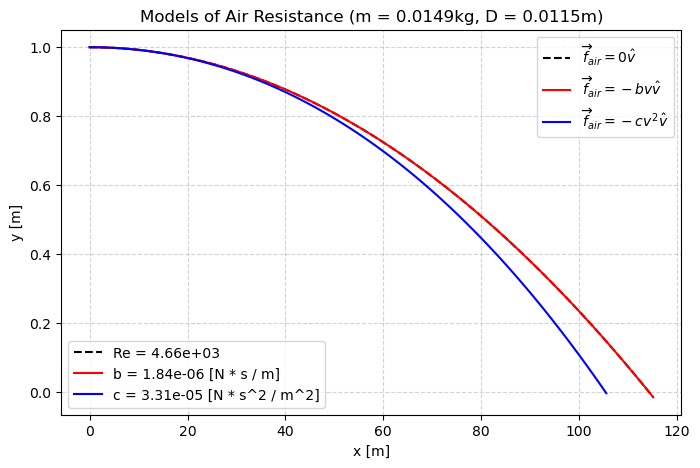

In [3]:
traj1 = Trajectory(0.0149, 0.0115)
traj1.SolveODEs(0, 1, 253, 0)
traj1.PlotTrajectories()

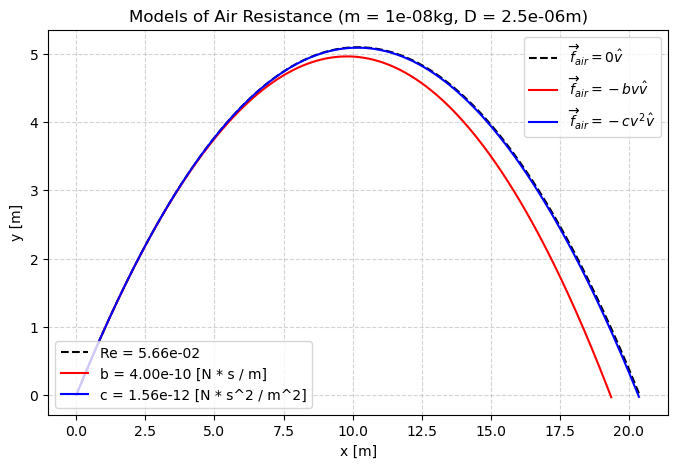

In [4]:
traj2 = Trajectory(0.00000001, 0.0000025)
traj2.SolveODEs(0, 0, 10, 10)
traj2.PlotTrajectories()